# Machine Learning, Assignment - 2 
## <div class="alert alert-info"><b>Predicting Diabetes Occurance Using Logistic Regression</b></div>

<div class="alert alert-info"> Consider the diabetes data (diabetes.csv) has a response variable of whether a person is having diabetes, which is given by a 1. </div>

<div class="alert alert-info"> 1. Import the dataset from https://www.kaggle.com/uciml/pima-indians-diabetes-database  (0.5 points). </div>

In [1]:
import numpy as np
import pandas as pd

diabetes = pd.read_csv('C:\Seetha\data\diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<div class="alert alert-info"> 2. Extract X as all columns except the last column and Y as last column. (0.5 points) </div>

In [3]:
X = diabetes.iloc[:, 0:8].values # columns names can be given.
Y = diabetes.iloc[:, -1].values # column name can be given.
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


<div class="alert alert-info"> 2A. Scale the features. (optional) This increases the accuracy. </div>

In [30]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

# apply scaler to X using fit_transform()
Xscaled = scaler.fit_transform(X)

# display the values
print('Shape of X after StandardScaler is ', Xscaled.shape)
# print('First 5 rows of X after StandardScaler')
# print(Xscaled[:5,:])

Shape of X after StandardScaler is  (768, 8)


<div class="alert alert-info">3. Visualize the dataset. (2 points) </div>

In [31]:
feature_names = diabetes.columns.tolist()[0:8]
print(feature_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


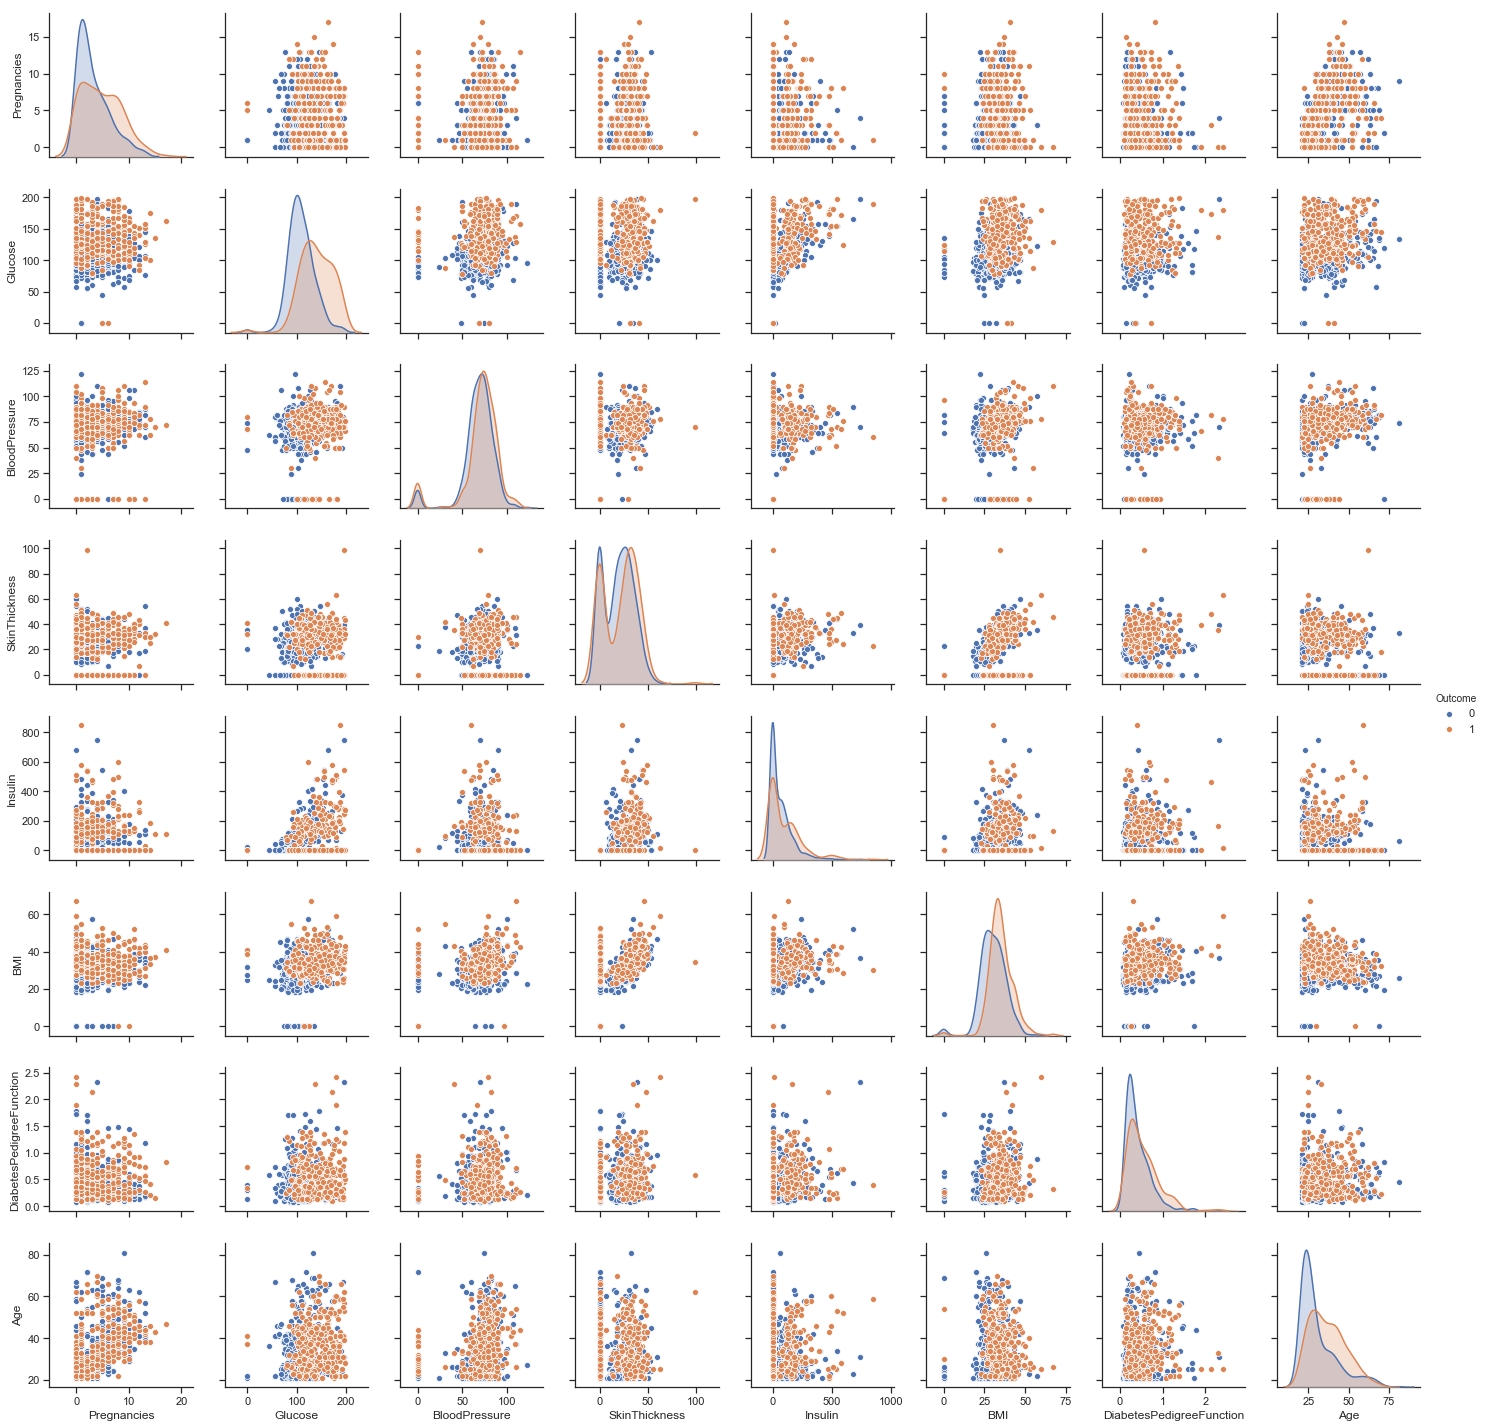

In [14]:
# pair plot to be plotted (minimum requirement)

# Basic correlogram
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(diabetes, vars=feature_names, hue='Outcome')


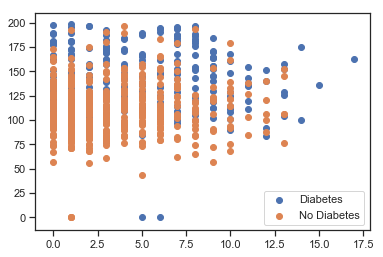

In [16]:
# plot of y alone
import matplotlib.pyplot as plt
%matplotlib inline

dia = diabetes.loc[Y == 1]
nodia = diabetes.loc[Y == 0]
plt.scatter(dia.iloc[:, 0], dia.iloc[:, 1], label='Diabetes')
plt.scatter(nodia.iloc[:, 0], nodia.iloc[:, 1], label='No Diabetes')
plt.legend()
plt.show()

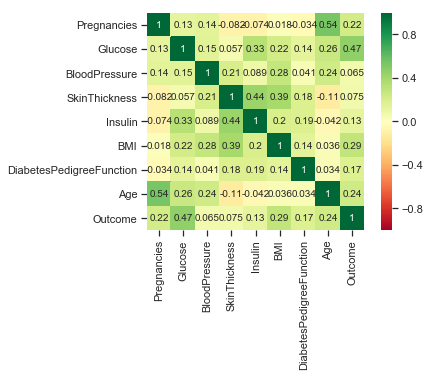

In [18]:
# correlation matrix (optional)

ax = sns.heatmap( diabetes.corr(),  vmin=-1, vmax=1, center=0,
    cmap='RdYlGn', annot=True, square=True )

# ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment='right')


<div class="alert alert-info">4. Split the data into training set and testing set. (1 points) Perform 10-fold cross validation. (optional) </div>

In [19]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(Xscaled, Y, test_size=1/3, stratify=Y)

<div class="alert alert-info">5. Train a Logistic regression model for the dataset. (2 points) </div>

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear') # default classfier

logistic_model.fit(X_train,Y_train)

y_prob  = logistic_model.predict(X_test)

<div class="alert alert-info">6. Display the coefficients and form the logistic regression equation. (1 point) </div>

<div class="alert alert-info"> 6A. Print the coefficients </div>

In [21]:
print('Intercept: ', logistic_model.intercept_)

print('Coeffients: ', logistic_model.coef_)


Inercept:  [-4.12476084]
Coeffients:  [[ 1.32134666  3.43279504 -0.75534221  0.15964261  0.57513803  2.01517014
   1.24267455  1.33890035]]


<div class="alert alert-info"> 6B. Logistic regression equation </div>

In [22]:
#Display the coefficients and form the logistic regression equation

coef_dict = {}
equation = 'z = '
equation = equation + str(logistic_model.intercept_) + ' ' 
for coef, feat in zip(logistic_model.coef_[0], feature_names):
    coef_dict[feat] = coef
    equation = equation + ' + ('+ str(coef.round(2)) +'*'+ str(feat) +')'
    
print('y = 1 / (1+e^(-z))')
print('where ')
print( equation)

y = 1 / (1+e^(-z))
where 
z = [-4.12476084]  + (1.32*Pregnancies) + (3.43*Glucose) + (-0.76*BloodPressure) + (0.16*SkinThickness) + (0.58*Insulin) + (2.02*BMI) + (1.24*DiabetesPedigreeFunction) + (1.34*Age)


<div class="alert alert-info">7. Compute the accuracy and confusion matrix. (2 points) </div>

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix 

acc = accuracy_score(Y_test, y_prob)
print('Accuracy: ', acc * 100)

conf_matrix = confusion_matrix(Y_test, y_prob) 
print('Confusion Matrix :', )
print(conf_matrix)


Accuracy:  78.90625
Confusion Matrix :
[[150  17]
 [ 37  52]]


<div class="alert alert-info">8. Plot the decision boundary. (1 point) </div>

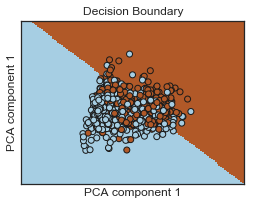

In [26]:
# Plotting the decision boundary for the model using PCA
# option 2

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(Xscaled)
pca_2d = pca.transform(Xscaled)

x_min, x_max = pca_2d.min() - .5, pca_2d.max() + .5
y_min, y_max = pca_2d.min() - .5, pca_2d.max() + .5

h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

logreg = LogisticRegression(solver='liblinear')
logreg.fit(pca_2d, Y)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('PCA component 1')
plt.ylabel('PCA component 1')
plt.title('Decision Boundary')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

<div class="alert alert-info">9. Identify which of the following variables are positively associated with the target column. (1 point) </div>

In [27]:
print('Positively associated features : ')
for key, val in coef_dict.items():
    if val > 0:
        print(key)

Positively associated features : 
Pregnancies
Glucose
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


<div class="alert alert-info"> 10. For a woman aged 35 and mother of 2 children, by how much does the probability of diabetes increase, if her bmi was 35 instead of 24 according to the model?(2 points) </div>

In [29]:
newx = np.array([6,108,44,20,130,35,0.813,35])
newx = (newx).reshape(1, -1)

print('x = ', newx)
print('y = ', logistic_model.predict(newx))

print("Predicted the person "," does not have Diabetes" if logistic_model.predict(newx)==0 else " has Diabetes" )

#Probability estimates.
# print(logistic_model.predict_proba(newx))

# Predict confidence scores for samples.
print( 'Confidence score = ' , logistic_model.decision_function(newx) )

x =  [[  6.    108.     44.     20.    130.     35.      0.813  35.   ]]
y =  [1]
Predicted the person   has Diabetes
Confidence score =  [537.67368344]
